In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
import numpy as np

In [45]:
train_data = torchvision.datasets.CIFAR10(
    root='./data.cifar10',                          # location of the dataset
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C x H x W)
    download=True                                   # if you haven't had the dataset, this will automatically download it for you
)
train_loader = Data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)

test_data = torchvision.datasets.CIFAR10(root='./data.cifar10/', train=False, transform=torchvision.transforms.ToTensor())

test_loader = Data.DataLoader(dataset=test_data,  batch_size=64,shuffle=False )

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


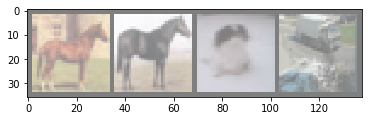

horse horse   dog truck


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [62]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(3*32*32, 100)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(100,25)
        self.dropout2 = torch.nn.Dropout(0.25)
        self.output = torch.nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.flatten(self.dropout1(x),1)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.output(x)
        return x

net = Net()

In [63]:
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=100, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=25, bias=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (output): Linear(in_features=25, out_features=10, bias=True)
)


In [64]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

In [65]:
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
                images = images.view(-1,32*32*3)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [66]:
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for step, (inputs, labels) in enumerate(train_loader):
        net.train()
        # get the inputs; data is a list of [inputs, labels]
        inputs = inputs.view(-1, 32*32*3)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if step % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, step + 1, running_loss / 2000))
            test()
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 5.013
Accuracy of the network on the 10000 test images: 10 %
[1,  4000] loss: 2.320
Accuracy of the network on the 10000 test images: 10 %
[1,  6000] loss: 2.323
Accuracy of the network on the 10000 test images: 10 %
[1,  8000] loss: 2.565
Accuracy of the network on the 10000 test images: 10 %
[1, 10000] loss: 2.322
Accuracy of the network on the 10000 test images: 10 %
[1, 12000] loss: 2.320
Accuracy of the network on the 10000 test images: 10 %
Finished Training
